## MINIST Dataset

In [1]:
#Importing the libraries and loading the dataset.

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,  Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
#Spliting data between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data ()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
import numpy as np
#Converting class vectors to binary class matrices

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
#Create a  CNN Model

batch_size = 128
num_classes = 10
epochs = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [5]:
# Train the Model

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/2
469/469 [==============================] - 100s 213ms/step - loss: 2.2768 - accuracy: 0.1782 - val_loss: 2.2303 - val_accuracy: 0.4560
Epoch 2/2
469/469 [==============================] - 97s 206ms/step - loss: 2.1997 - accuracy: 0.3388 - val_loss: 2.1379 - val_accuracy: 0.5941
The model has successfully trained
Saving the model as mnist.h5


In [6]:
# Evaluate the Model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1378798484802246
Test accuracy: 0.5940999984741211


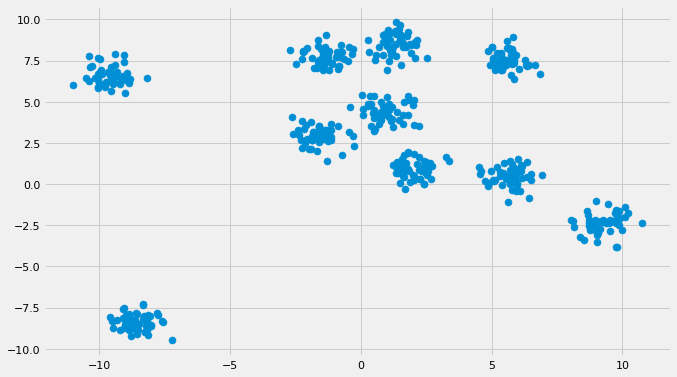

In [37]:
# Using k-means Clustering

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

features, label = make_blobs(n_samples=500, centers=10,
                       cluster_std=0.55, random_state=0)
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(features)
kmeansLabels = kmeans.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=kmeansLabels, s=50, cmap='viridis')

clusterCenters = kmeans.cluster_centers_
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='red', s=200, alpha=0.8);

In [ ]:
#Creating GUI for Predicting Hand written Digits.

from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #Resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #Reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #Predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #Self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # Geting handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # Geting the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()